In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [4]:
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

In [8]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [10]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [11]:
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [15]:
from tensorflow.keras import optimizers
rmsprop = optimizers.RMSprop(learning_rate=0.001)

In [16]:
model.compile(optimizer=rmsprop,
               loss='categorical_crossentropy',
               metrics=['accuracy'])
# metrics => 모형의 성능을 무엇으로 평가할 것인지에 대한 것
# 'accuracy' => 전체의 관측치 중에서 몇 개 관측치의 종속변수 값을 제대로 맞혔는지를 의미

In [17]:
history = model.fit(train_images, train_labels_one_hot, epochs=5, batch_size=128, validation_split = 0.2)

Epoch 1/20
375/375 [==============================] - 6s 16ms/step - loss: 0.2886 - accuracy: 0.9148 - val_loss: 0.1518 - val_accuracy: 0.9554
Epoch 2/20
375/375 [==============================] - 6s 15ms/step - loss: 0.1205 - accuracy: 0.9638 - val_loss: 0.1137 - val_accuracy: 0.9656
Epoch 3/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0785 - accuracy: 0.9771 - val_loss: 0.0940 - val_accuracy: 0.9715
Epoch 4/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0565 - accuracy: 0.9831 - val_loss: 0.0879 - val_accuracy: 0.9758
Epoch 5/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0423 - accuracy: 0.9876 - val_loss: 0.0823 - val_accuracy: 0.9773
Epoch 6/20
375/375 [==============================] - 9s 23ms/step - loss: 0.0321 - accuracy: 0.9907 - val_loss: 0.0804 - val_accuracy: 0.9777
Epoch 7/20
375/375 [==============================] - 10s 27ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0792 - val_accuracy: 0.977

fit() 함수를 통해서 학습 <br>
epochs => 전체의 학습 데이터를 몇번 사용해서 학습 할 것인지에 대한 것 <br>
epochs = 5 라는 것은 5번 사용한다는 것을 의미 <br>
batch_size 는 경사하강법에서 한번에 몇개의 data points를 사용해서 weight를 업데이트 할 것인지에 대한 것 <br>
batch_size=128 는 한번에 128개의 이미지를 사용해서 weight를 업데이트 한다는 것을 의미

In [24]:
model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0995 - accuracy: 0.9821


[0.09946753829717636, 0.9821000099182129]

# 과적합 Check: 비용함수값 확인하기

In [25]:
import matplotlib.pyplot as plt

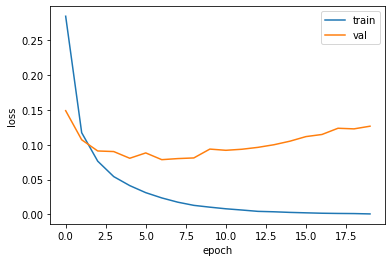

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()